In [17]:
import json
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import pandas as pd

RESULTS_DIR = Path("resultados")
    
NOMES_OCR = {
    "TESSERACT": "Tesseract",
    "TESSERACT_THREAD": "Tesseract Thread",
    "EASYOCR": "EasyOCR",
    "EASYOCR_THREAD": "EasyOCR Batch"
}

NOMES_GRADE = {
    "CANNY": "Canny Edge Detection",
    "COR": "Segmentação por Cor",
    "CANNY_FIXED": "Canny Edge Detection (1º detecção)",
    "COR_FIXED": "Segmentação por Cor (1º detecção)"
}

Métrica 1: Tempo médio por combinação

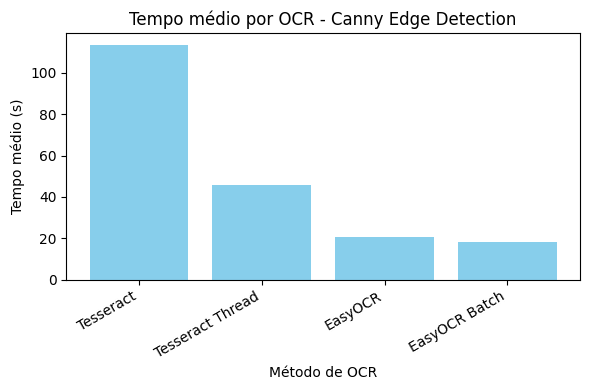

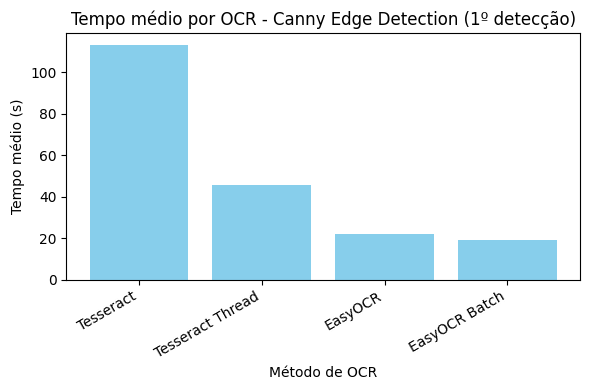

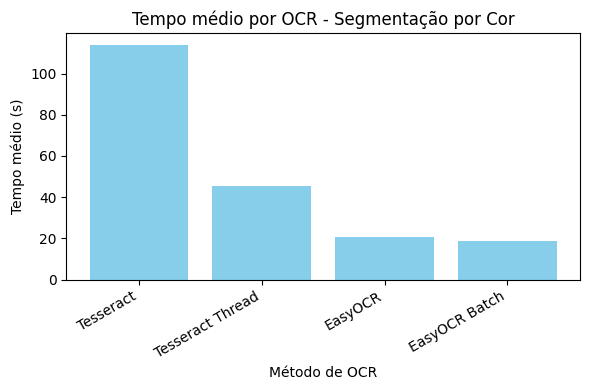

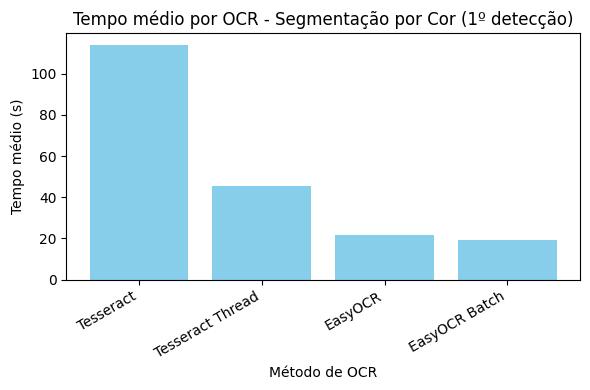

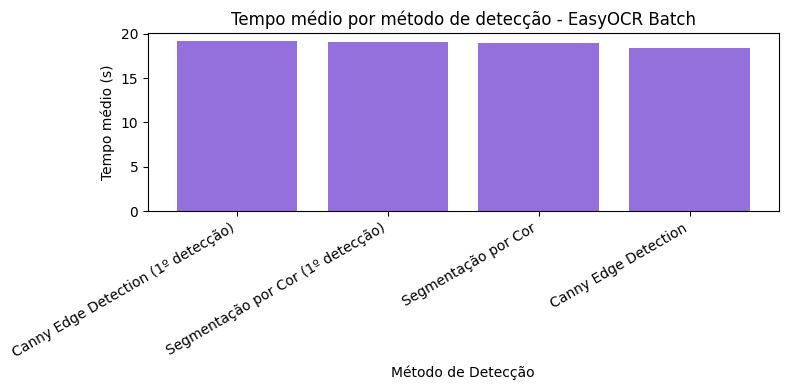

,Método,Mínimo,Máximo,Média,Desvio Padrão
12,Tesseract + Segmentação por Cor (1º detecção),113.88,114.63,114.13,0.21
8,Tesseract + Segmentação por Cor,113.72,114.60,114.07,0.24
0,Tesseract + Canny Edge Detection,112.75,114.35,113.63,0.49
4,Tesseract + Canny Edge Detection (1º detecção),112.95,113.78,113.22,0.22
2,Tesseract Thread + Canny Edge Detection,45.55,46.57,45.91,0.24
6,Tesseract Thread + Canny Edge Detection (1º detecção),45.29,46.97,45.72,0.48
10,Tesseract Thread + Segmentação por Cor,45.02,45.99,45.53,0.23
14,Tesseract Thread + Segmentação por Cor (1º detecção),45.03,46.42,45.45,0.30
13,EasyOCR + Segmentação por Cor (1º detecção),21.59,22.11,21.87,0.17
5,EasyOCR + Canny Edge Detection (1º detecção),21.17,22.16,21.75,0.24


In [24]:
# Carrega os resultados
with open(RESULTS_DIR / "resultados_2048.json", "r", encoding="utf-8") as f:
    resultados = json.load(f)

# Agrupa os resultados por grade: { grade: [(ocr, tempos)] }
grade_dict = defaultdict(list)

for r in resultados:
    nome_ocr = NOMES_OCR.get(r["ocr"], r["ocr"])
    nome_grade = NOMES_GRADE.get(r["grade"], r["grade"])
    tempos = r["tempos"]
    grade_dict[nome_grade].append((nome_ocr, tempos))

# Gera um gráfico para cada método de grade
for grade_legivel, ocrs_tempos in grade_dict.items():
    dados = []

    for ocr_legivel, tempos in ocrs_tempos:
        media = np.mean(tempos)
        dados.append((ocr_legivel, media))

    # Ordena pela média decrescente
    dados.sort(key=lambda x: x[1], reverse=True)

    labels = [item[0] for item in dados]
    medias = [item[1] for item in dados]

    plt.figure(figsize=(6, 4))
    plt.bar(labels, medias, color="skyblue")
    plt.title(f"Tempo médio por OCR - {grade_legivel}")
    plt.ylabel("Tempo médio (s)")
    plt.xlabel("Método de OCR")
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()

# Compara com o mesmo OCR
ocr_fixo = "EASYOCR_THREAD"
resultados_filtrados = [r for r in resultados if r["ocr"] == ocr_fixo]

dados_grade = []

for r in resultados_filtrados:
    nome_grade = NOMES_GRADE.get(r["grade"], r["grade"])
    media = np.mean(r["tempos"])
    dados_grade.append((nome_grade, media))

# Ordena por tempo médio decrescente
dados_grade.sort(key=lambda x: x[1], reverse=True)

labels = [item[0] for item in dados_grade]
medias = [item[1] for item in dados_grade]

plt.figure(figsize=(8, 4))
plt.bar(labels, medias, color="mediumpurple")
plt.title("Tempo médio por método de detecção - EasyOCR Batch")
plt.ylabel("Tempo médio (s)")
plt.xlabel("Método de Detecção")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

# Cria tabela de estatísticas
linhas = []

for r in resultados:
    nome_ocr = NOMES_OCR.get(r["ocr"], r["ocr"])
    nome_grade = NOMES_GRADE.get(r["grade"], r["grade"])
    tempos = np.array(r["tempos"])
    label = f"{nome_ocr} + {nome_grade}"

    linha = {
        "Método": label,
        "Mínimo": np.min(tempos),
        "Máximo": np.max(tempos),
        "Média": np.mean(tempos),
        "Desvio Padrão": np.std(tempos)
    }
    linhas.append(linha)

# Tabela ordenada pela média
df_tempos = pd.DataFrame(linhas).sort_values(by="Média", ascending=False)

# Exibe a tabela com duas casas decimais
df_tempos.style.format({
    "Mínimo": "{:.2f}",
    "Máximo": "{:.2f}",
    "Média": "{:.2f}",
    "Desvio Padrão": "{:.2f}"
})

Métrica 2: Pontuação e Máx tile por partida (de um método específico)

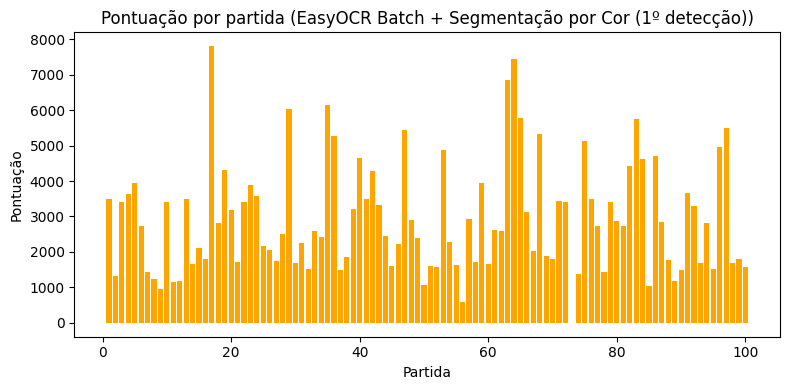

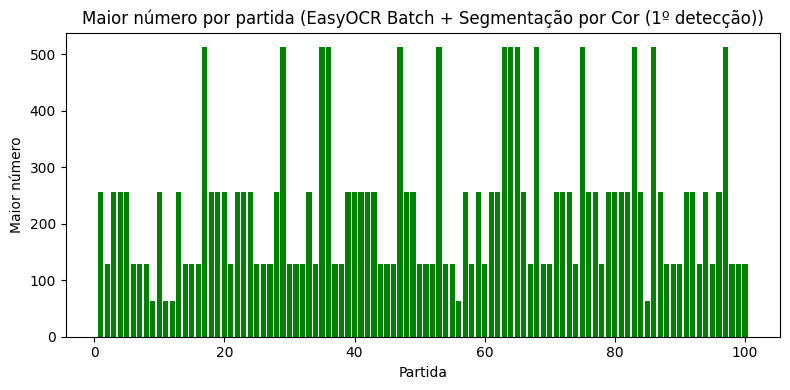

,Métrica,Mínimo,Máximo,Média,Desvio Padrão
0,Pontuação,-1.00,7804.00,2930.07,1561.46
1,Maior número,64.00,512.00,231.04,130.19


In [26]:
# Carrega os resultados
with open(RESULTS_DIR / "resultados_think_2048.json", "r", encoding="utf-8") as f:
    resultados = json.load(f)

# Um único método testado
r = resultados[0]

pontuacoes = np.array(r["pontuacoes"])
maiores_numeros = np.array(r["maiores_numeros"])
nome_ocr = NOMES_OCR.get(r["ocr"], r["ocr"])
nome_grade = NOMES_GRADE.get(r["grade"], r["grade"])

# Gráfico: Pontuações por partida
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(pontuacoes) + 1), pontuacoes, color="orange")
plt.title(f"Pontuação por partida ({nome_ocr} + {nome_grade})")
plt.xlabel("Partida")
plt.ylabel("Pontuação")
plt.tight_layout()
plt.show()

# Gráfico: Maior número por partida
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(maiores_numeros) + 1), maiores_numeros, color="green")
plt.title(f"Maior número por partida ({nome_ocr} + {nome_grade})")
plt.xlabel("Partida")
plt.ylabel("Maior número")
plt.tight_layout()
plt.show()

# Tabela com estatísticas
tabela_stats = pd.DataFrame(
    {
        "Métrica": ["Pontuação", "Maior número"],
        "Mínimo": [np.min(pontuacoes), np.min(maiores_numeros)],
        "Máximo": [np.max(pontuacoes), np.max(maiores_numeros)],
        "Média": [np.mean(pontuacoes), np.mean(maiores_numeros)],
        "Desvio Padrão": [np.std(pontuacoes), np.std(maiores_numeros)],
    }
)

# Exibe a tabela formatada
tabela_stats.style.format(
    {
        "Mínimo": "{:.2f}",
        "Máximo": "{:.2f}",
        "Média": "{:.2f}",
        "Desvio Padrão": "{:.2f}",
    }
)

Gráfico 4: Total de falhas por combinação

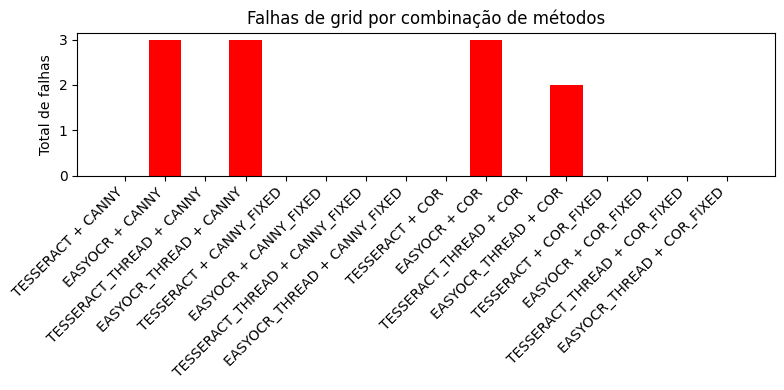

In [21]:
labels = []
falhas = []

for r in resultados:
    label = f"{r['ocr']} + {r['grade']}"
    labels.append(label)
    falhas.append(r["falhas_grid"])

plt.figure(figsize=(8, 4))
plt.bar(labels, falhas, color="red")
plt.xticks(rotation=45, ha="right")
plt.title("Falhas de grid por combinação de métodos")
plt.ylabel("Total de falhas")
plt.tight_layout()
plt.show()
